In [1]:
!pip install ultralytics gradio roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 128.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="zyD6U9yvp0HKnAVhZLSN")  # 留空
project = rf.workspace("steam-re").project("ant-detection-vh7cd")
dataset = project.version(4).download("yolov8")  # 指定 YOLOv8 格式

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ant-Detection-4 in yolov8:: 100%|██████████| 2412/2412 [00:01<00:00, 1692.81it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano 版，轻量

results = model.train(
    data="/content/ant-detection-vh7cd-4/data.yaml",  # 新路径
    epochs=50,  # 小数据集用 50
    imgsz=640,  # 高分辨率优化小蚂蚁检测
    batch=16,
    device=0,  # GPU
    name="small_ant_detection_v2"  # 新结果文件夹
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ant-detection-vh7cd-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small_ant_detection_v22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3420.9±1441.8 MB/s, size: 199.7 KB)
val: Scanning /content/ant-detection-vh7cd-4/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 220.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.7it/s 4.0s
                   all        100       1623      0.945      0.943       0.98      0.636
                  ants        100       1522      0.939      0.905      0.969      0.574
              warriors        100        101      0.952       0.98      0.992      0.698
Speed: 3.1ms preprocess, 5.8ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to /content/runs/detect/val
mAP@0.5: 0.980

image 1/1 /content/ant-detection-vh7cd-4/test/images/WIN_20231015_16_13_

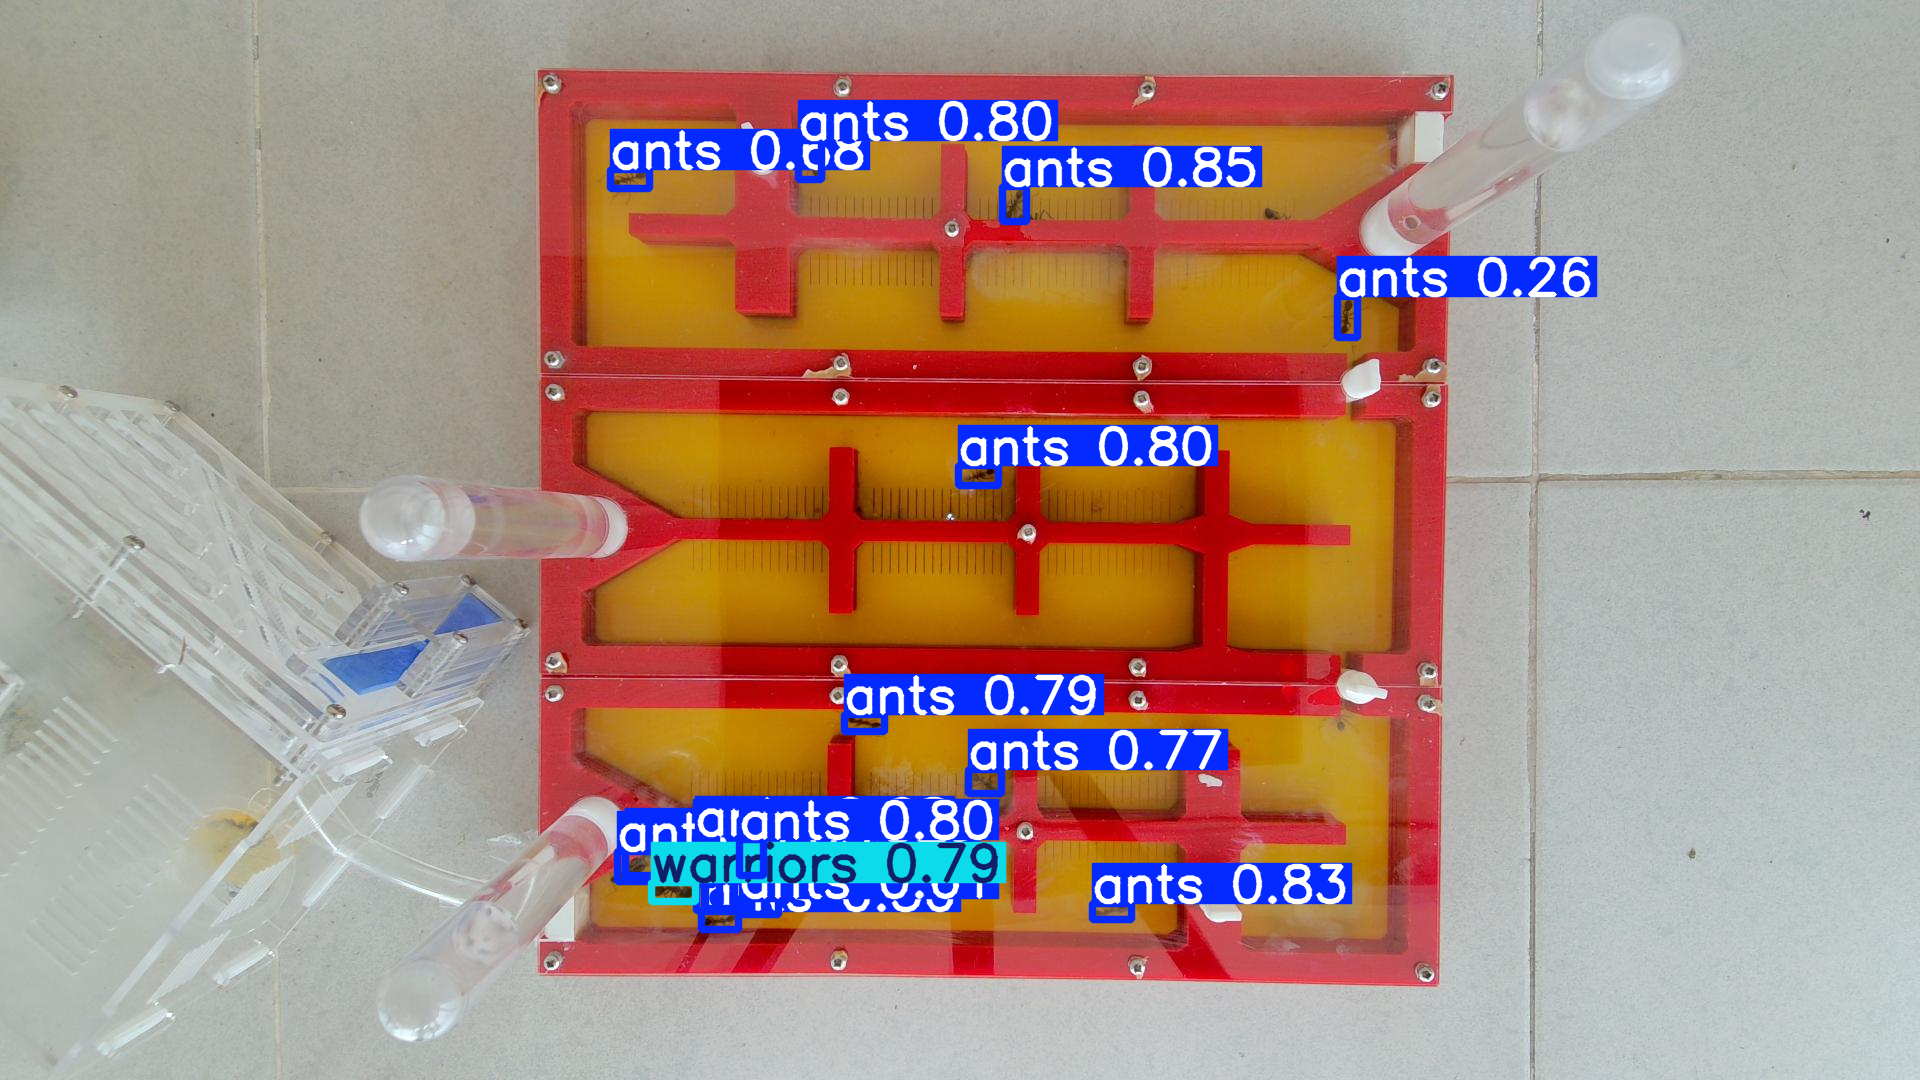

In [5]:
metrics = model.val()
print(f"mAP@0.5: {metrics.box.map50:.3f}")
# 测试单图
results = model("/content/ant-detection-vh7cd-4/test/images/WIN_20231015_16_13_27_Pro_jpg.rf.ba8f667cd6711b06af6d3be334659916.jpg")  # 替换一个图像路径
results[0].show()  # 显示带 bbox 的图像

In [6]:
# 导出
model.export(format="onnx")  # 生成 best.onnx
!ls /content/runs/detect/small_object_detection/weights/

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/small_ant_detection_v22/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 11.3s, saved as '/content/runs/detect/small_ant_detection_v22/weights/best.onnx' (11.7 MB)

Export complete (11.7s)
Results saved to /content/runs/detect/small_ant_detection_v22/weights
Predict:         yolo predict task=detect mode

In [11]:
!pip install nest-asyncio

In [12]:
import nest_asyncio
nest_asyncio.apply()  # 应用 patch，解决 event loop 冲突

import gradio as gr
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np

# 加载模型
model = YOLO("/content/runs/detect/small_ant_detection_v22/weights/best.onnx", task='detect')

def detect_objects(image, conf_threshold=0.25, iou_threshold=0.45):
    if image is None:
        return image, "请上传图像"

    # 转换为 numpy
    img = np.array(image)

    # 运行检测
    results = model(img, conf=conf_threshold, iou=iou_threshold, verbose=False)

    # 绘制结果
    annotated_img = results[0].plot()
    annotated_img = Image.fromarray(annotated_img)

    # 获取检测信息
    detections = results[0].boxes.data.cpu().numpy() if results[0].boxes is not None else np.array([])
    info = f"检测到 {len(detections)} 个物体 (conf > {conf_threshold})"

    return annotated_img, info

# Gradio 界面
iface = gr.Interface(
    fn=detect_objects,
    inputs=[
        gr.Image(type="pil", label="上传图像"),
        gr.Slider(0.1, 0.9, value=0.25, label="置信度阈值 (Confidence)"),
        gr.Slider(0.1, 0.9, value=0.45, label="IoU 阈值")
    ],
    outputs=[
        gr.Image(type="pil", label="检测结果"),
        gr.Textbox(label="检测信息")
    ],
    title="YOLOv8 小蚂蚁检测 Demo",
    description="上传图像检测小蚂蚁，调整阈值优化结果。"
)

# 启动
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://18ce960a555cbc7eaf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Loading /content/runs/detect/small_ant_detection_v22/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.0 CUDAExecutionProvider
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://18ce960a555cbc7eaf.gradio.live


In [13]:
from google.colab import files
files.download('/content/runs/detect/small_ant_detection_v22/weights/best.pt')
files.download('/content/runs/detect/small_ant_detection_v22/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>